In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
import bidi.algorithm
from wordcloud import WordCloud

base_url = "https://www.findsaudi.com"

url = base_url + "/ar/Cat/528/%D9%85%D8%AD%D8%A7%D9%85%D9%88%D9%86.aspx?pagerId=1"

pages = []

while True:
    
    response = requests.get(url)

    soup = BeautifulSoup(response.content, "html.parser")

    page_names = soup.find_all(class_="page-name")
    page_names = [element.text for element in page_names]

    cities = soup.find_all(class_="city")
    cities = [element.text for element in cities]

    phones = soup.find_all(class_="phone")
    phones = [element.text for element in phones]
    
    data = {
        "name": page_names,
        "city": cities,
        "phone": phones
    }
   
    pages.append(data)
  
    next_page = soup.find(class_="next-pg")
    
    if not next_page:
        break

    
    url = base_url + next_page['href']


df = pd.concat([pd.DataFrame(page) for page in pages], ignore_index=True)

In [2]:
df.head()

,name,city,phone
0,\nعبدالرحمن البلوي للمحاماة\n,الرياض,966-5-2337009
1,\nمكتب محمد الجهني للمحاماة و الاستشارات القان...,الرياض,966-555-597439
2,\nشركة محمد عبود الدوسري للمحاماة والاستشارات ...,جدة,966-54-504 0509
3,\nمكتب الصفوة للمحاماة - الرياض\n,الرياض,966-12-6541504
4,\nمكتب الصفوة للمحاماة والاستشارات القانونية\n,جدة,966-12-6541504


In [3]:
df['name'] = df['name'].str.strip()

In [4]:
df.head()

,name,city,phone
0,عبدالرحمن البلوي للمحاماة,الرياض,966-5-2337009
1,مكتب محمد الجهني للمحاماة و الاستشارات القانونية,الرياض,966-555-597439
2,شركة محمد عبود الدوسري للمحاماة والاستشارات ال...,جدة,966-54-504 0509
3,مكتب الصفوة للمحاماة - الرياض,الرياض,966-12-6541504
4,مكتب الصفوة للمحاماة والاستشارات القانونية,جدة,966-12-6541504


In [5]:
df.shape

(94, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    94 non-null     object
 1   city    94 non-null     object
 2   phone   94 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


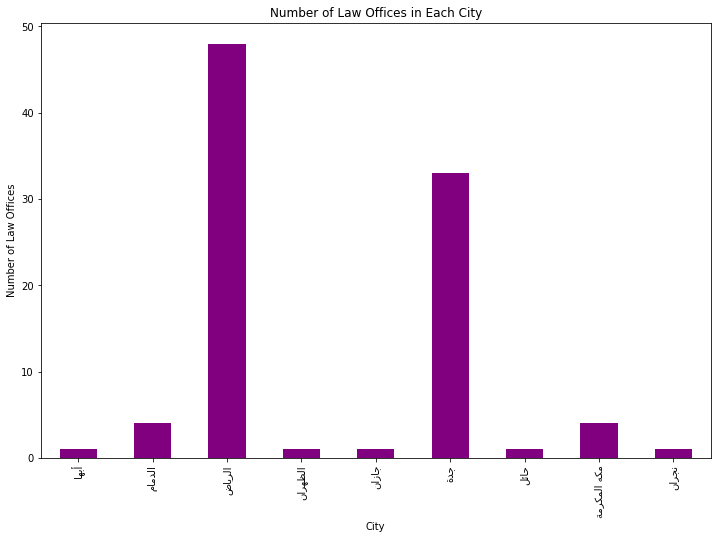

In [7]:
grouped = df.groupby('city').count()


grouped.index = [bidi.algorithm.get_display(arabic_reshaper.reshape(city)) for city in grouped.index]


grouped['name'].plot(kind='bar', figsize=(12, 8), color='purple')

plt.title("Number of Law Offices in Each City")
plt.xlabel("City")
plt.ylabel("Number of Law Offices")


plt.show()


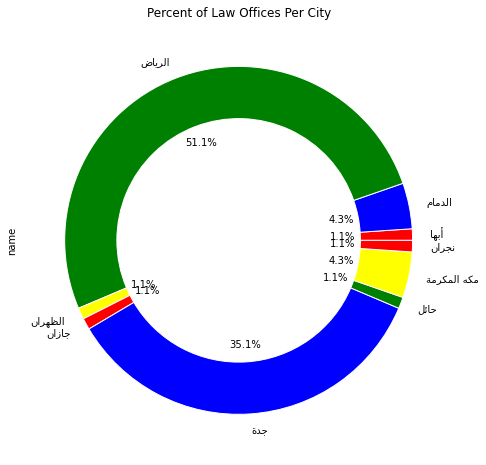

In [8]:
grouped = df.groupby(by='city').count()

grouped.index = [bidi.algorithm.get_display(arabic_reshaper.reshape(name)) for name in grouped.index]

grouped['name'].plot(kind='pie', figsize=(12, 8), autopct='%.1f%%', colors=['red', 'blue', 'green', 'yellow'],
        wedgeprops=dict(width=0.3, edgecolor='w'))

plt.title("Percent of Law Offices Per City")

plt.show()


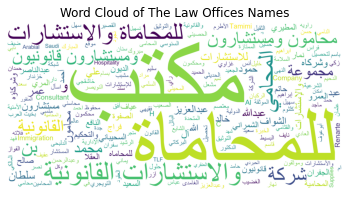

In [9]:
names = ' '.join(df['name'].tolist())

names = arabic_reshaper.reshape(names)

names = bidi.algorithm.get_display(names)

wordcloud = WordCloud(font_path='arial', background_color='white', mode='RGB', width=2000, height=1000).generate(names)

plt.title("Word Cloud of The Law Offices Names")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Thank You